# Tasca M7 T01

##### Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import random
#import math
#from math import sqrt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#Modelos de regresion
#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor



#Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

#Preprocesamiento
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

## Exercici 1
### Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

Nos encontramos ante un dataset resultado de un análisis químico de vinos cultivados en la misma región de Italia pero procedentes de tres
      cultivares diferentes.
      El análisis determinó las cantidades de 13 componentes 
      encontrados en cada uno de los tres tipos de vinos. 

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline 

El primer atributo es el identificador de clase "CLASS" y será nuestro target. Tenemos 3 clases [1, 2, 3]

El data set no incluye cabecera con el nombre de las columnas. Encontramos los atributos en el archivo adjunto del ejercicio. [wineNames.txt](https://github.com/Huanhotze/Sprint-7.-Algoritmes-daprenentatge-supervisat-Classificacio/blob/main/M7%20DATA/wineNames.txt)

In [2]:
#https://github.com/Huanhotze/Sprint-7.-Algoritmes-daprenentatge-supervisat-Classificacio/blob/main/M7%20DATA/wineData.txt
url = 'https://raw.githubusercontent.com/Huanhotze/Sprint-7.-Algoritmes-daprenentatge-supervisat-Classificacio/main/M7%20DATA/wineData.txt'

df = pd.read_csv(url, header=None)
df.columns = ["CLASS","Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"]
df.head()

,CLASS,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Analisis de la base de datos para su compresión.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


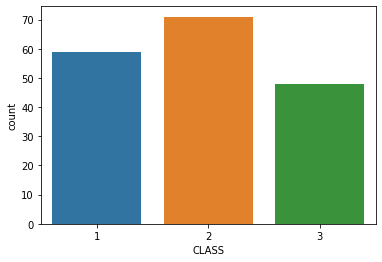

In [3]:
df.CLASS.unique()
df.CLASS.value_counts()
sns.countplot(df.CLASS)

In [4]:
df.shape

(178, 14)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLASS,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CLASS                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().values.any()

False

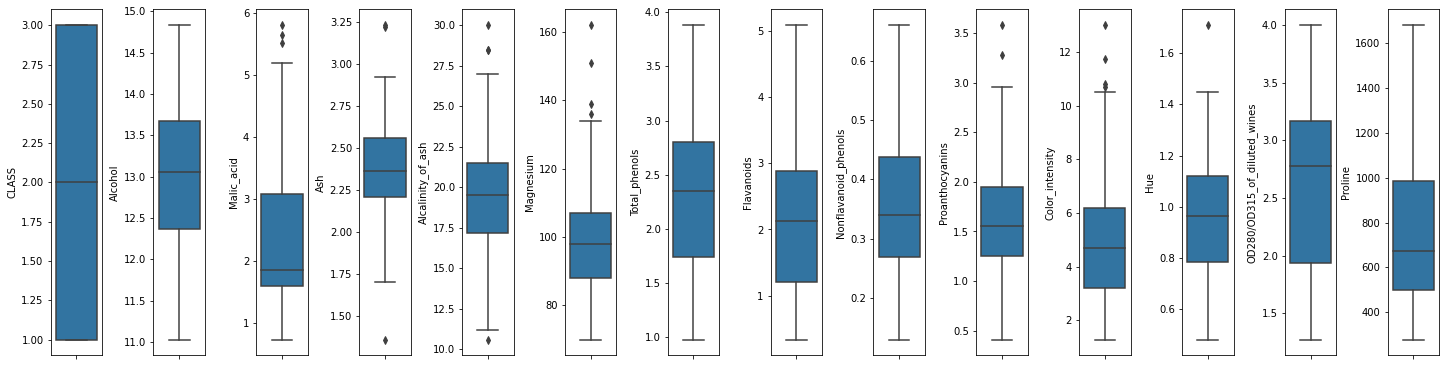

In [9]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Preprocesado

Previo a separar el dataset en Train/Test preprocesaremos los datos para  aumentar la precisión y la eficacia de un modelo de aprendizaje automático.

Como podemos apreciar en las gráficas boxplot, hemos encontrado Features con Outlayers, para los que utilizaremos [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). Este escalador elimina la mediana y escala los datos según el rango de cuantiles.

Para el resto utilizaremos una normalización con [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler) de manera que pase los valores a un rango entre 0 y 1.
[, ,
       ]

* MINMAXSCALER ['Alcohol', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'OD280/OD315_of_diluted_wines', 'Proline']
* ROBUSTSCALER ['Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', 'Color_intensity', 'Hue']


In [10]:
df.columns

Index(['CLASS', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [11]:
columnsNorm = ['Alcohol', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'OD280/OD315_of_diluted_wines', 'Proline']
scaler = MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust =  ['Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', 'Color_intensity', 'Hue']
scaler = RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

#### Test/Train


In [12]:
#Separamos el dataset entre las features a estudiar y el Target
X = df.drop(['CLASS'], axis=1) 
y = df['CLASS']

#Hacemos la separación Train/Test siendo la parte test el 30% y la train el 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### 1 Random Forest Classifier

[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
prediction_rf = rf.predict(X_test)
prediction_rf

array([1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 3, 2, 3, 1, 2, 3, 3,
       2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 3,
       2, 1, 2, 3, 3, 2, 2, 2, 1, 1])

#### 2 KNeighborsClassifier

[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [15]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
prediction_kn = kn.predict(X_test)
prediction_kn

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 2, 3, 1, 2, 3, 3,
       2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1])

## Exercici 2
###  Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.



#### Classification Accuracy

In [17]:
accuracy_rf = metrics.accuracy_score(y_test, prediction_rf)
accuracy_kn = metrics.accuracy_score(y_test, prediction_kn)

In [18]:
# Ponemos los datos en un dataframe para que sea más sencillo compararlo

accuracy = pd.DataFrame( 
    data = [('Random Forest Classifier', accuracy_rf),
            ('KNeighborsClassifier', accuracy_kn)],
            columns = ['Model', 'Accuracy'])

accuracy

,Model,Accuracy
0,Random Forest Classifier,0.944444
1,KNeighborsClassifier,0.925926


Siguiendo la metrica de precisión "accuracy" Random Forest es 6 puntos porcentuales más preciso que KNeighbors

#### Confusion Matrix

In [19]:
cm_fr = metrics.confusion_matrix(y_test, prediction_rf)

In [20]:
cm_kn = metrics.confusion_matrix(y_test, prediction_kn)

In [21]:
# Ponemos los datos de la confusion matrix del "Random Forest Classifier" para que sea más sencillo analizarlo.

cm_fr = pd.DataFrame(cm_fr,
                     index = ['1 Real','2 Real','3 Real'], 
                     columns = ['1 Pred','2 Pred','3 Pred'])

cm_fr

,1 Pred,2 Pred,3 Pred
1 Real,20,2,0
2 Real,0,21,1
3 Real,0,0,10


In [22]:
# Ponemos los datos de la confusion matrix del "KNeighborsClassifier" para que sea más sencillo analizarlo.

cm_kn = pd.DataFrame(cm_kn,
                     index = ['1 Real','2 Real','3 Real'], 
                     columns = ['1 Pred','2 Pred','3 Pred'])

cm_kn

,1 Pred,2 Pred,3 Pred
1 Real,21,1,0
2 Real,3,19,0
3 Real,0,0,10


De nuevo Random Forest aparece como mas preciso bajo la metrica de Confusion Matrix. 

Se puede apreciar claramente que ambos modelos han tenido errores de predicción tanto en la clase 1 como en la clase 2 siendo KNeighbors el que mayores errores a tenido, haciendo 4 predicciones erroneas vs las 3 predicciones erroneas que ha realizado Random Forest.

####  Classification Report 

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [23]:
print(metrics.classification_report(y_test, prediction_rf, digits=3))

              precision    recall  f1-score   support

           1      1.000     0.909     0.952        22
           2      0.913     0.955     0.933        22
           3      0.909     1.000     0.952        10

    accuracy                          0.944        54
   macro avg      0.941     0.955     0.946        54
weighted avg      0.948     0.944     0.945        54



In [24]:
print(metrics.classification_report(y_test, prediction_kn, digits=3))

              precision    recall  f1-score   support

           1      0.875     0.955     0.913        22
           2      0.950     0.864     0.905        22
           3      1.000     1.000     1.000        10

    accuracy                          0.926        54
   macro avg      0.942     0.939     0.939        54
weighted avg      0.929     0.926     0.926        54



####  Cohen’s Kappa Coefficient

El Coeficiente kappa de Cohen es una medida estadística que ajusta el efecto del azar en la proporción de la concordancia observada1​ para elementos cualitativos (variables categóricas). En general se cree que es una medida más robusta que el simple cálculo del porcentaje de concordancia, ya que κ tiene en cuenta el acuerdo que ocurre por azar.

Kappa value interpretation Landis & Koch (1977):
<0 No agreement


0 — .20 Slight


.21 — .40 Fair


.41 — .60 Moderate


.61 — .80 Substantial


.81–1.0 Perfect



In [25]:
kappa_rf = metrics.cohen_kappa_score(y_test, prediction_rf)

In [26]:
kappa_kn = metrics.cohen_kappa_score(y_test, prediction_kn)

In [27]:
# Ponemos los datos en un dataframe para que sea más sencillo compararlo

kappa = pd.DataFrame( 
    data = [('Random Forest Classifier', kappa_rf),
            ('KNeighborsClassifier', kappa_kn)],
            columns = ['Model', 'Cohen Kappa'])

kappa

,Model,Cohen Kappa
0,Random Forest Classifier,0.912903
1,KNeighborsClassifier,0.883117


## Exercici 3
### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.





Utilizaremos GridSearchCV para localizar los mejores parametros para cada modelo

#### 1 Random Forest Classifier



In [32]:
# define model
model = rf #Aprovechamos el modelo que definimos anteriormente

# define search
hyperparameters = dict()
hyperparameters['n_estimators'] = [200, 400, 600, 1200, 2000]
hyperparameters['random_state'] = [2, 3, 5, 9, 20]
hyperparameters['criterion'] = ['gini', 'entropy', 'log_loss']

search = GridSearchCV(model, hyperparameters, scoring='accuracy', n_jobs=-1, cv=10)

# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9888888888888889
Best Hyperparameters: {'criterion': 'gini', 'n_estimators': 200, 'random_state': 2}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
990 fits failed out of a total of 2970.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
990 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

In [34]:
rf2 = RandomForestClassifier(criterion= 'gini', n_estimators= 200, random_state= 2)
rf2.fit(X_train,y_train)
prediction_rf2 = rf2.predict(X_test)

accuracy_rf2 = metrics.accuracy_score(y_test, prediction_rf2)
kappa_rf2 = metrics.cohen_kappa_score(y_test, prediction_rf2)

In [35]:
rf_comp = pd.DataFrame( data = [('Random Forest Classifier Original', accuracy_rf, kappa_rf), 
                                  ('Random Forest Classifier Parametros', accuracy_rf2, kappa_rf2),],
                         columns = ['Model', 'Accuracy', 'Cohen Kappa'])
rf_comp

,Model,Accuracy,Cohen Kappa
0,Random Forest Classifier Original,0.944444,0.912903
1,Random Forest Classifier Parametros,0.962963,0.941935


#### 2 KNeighborsRegressor




In [42]:

# define model
model = kn #Aprovechamos el modelo que definimos anteriormente

# define search space
hyperparameters = dict()
hyperparameters['n_neighbors'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 21]
hyperparameters['leaf_size'] = [30, 45, 90, 180, 360]
hyperparameters['weights'] = ['uniform', 'distance']

search = GridSearchCV(model, hyperparameters, scoring='accuracy', n_jobs=-1, cv=10)

# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9326797385620915
Best Hyperparameters: {'leaf_size': 30, 'n_neighbors': 4, 'weights': 'distance'}


In [43]:
kn2 = KNeighborsClassifier(n_neighbors=4 , leaf_size = 30, weights = "distance")
kn2.fit(X_train, y_train)
prediction_kn2 = kn2.predict(X_test)

accuracy_kn2 = metrics.accuracy_score(y_test, prediction_kn2)
kappa_kn2 = metrics.cohen_kappa_score(y_test, prediction_kn2)

In [44]:
kn_comp = pd.DataFrame( data = [('KNeighborsClassifier Original', accuracy_kn, kappa_kn), 
                                  ('KNeighborsClassifier Parametros', accuracy_kn2, kappa_kn2),],
                         columns = ['Model', 'Accuracy', 'Cohen Kappa'])
kn_comp

,Model,Accuracy,Cohen Kappa
0,KNeighborsClassifier Original,0.925926,0.883117
1,KNeighborsClassifier Parametros,0.962963,0.941558


#### Veamos visualmente cual es el mejor modelo de  los entreados hasta el momento:

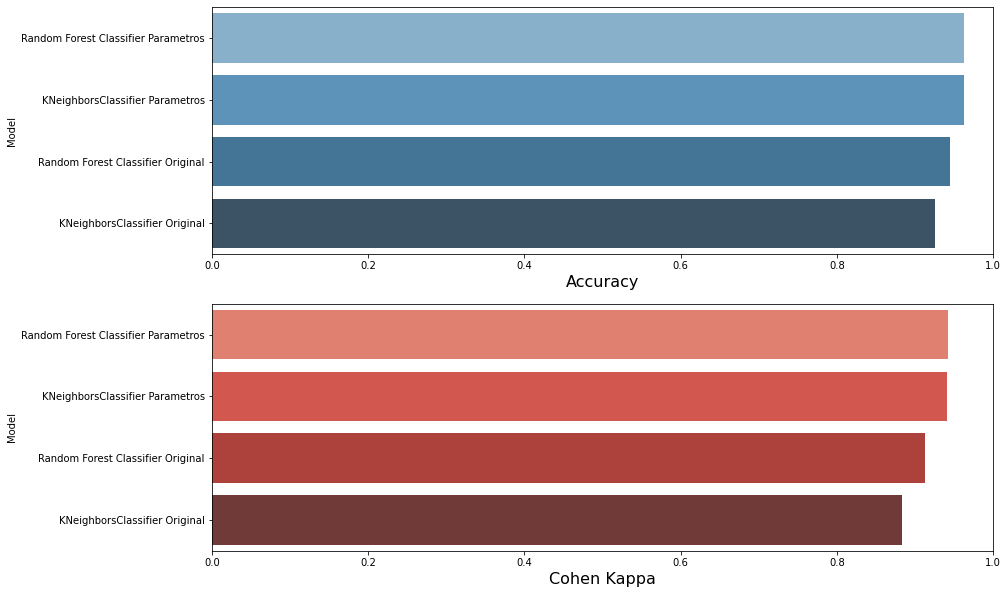

,Model,Accuracy,Cohen Kappa
1,Random Forest Classifier Parametros,0.962963,0.941935
1,KNeighborsClassifier Parametros,0.962963,0.941558
0,Random Forest Classifier Original,0.944444,0.912903
0,KNeighborsClassifier Original,0.925926,0.883117


In [46]:
models = rf_comp.append(kn_comp)

f, axes = plt.subplots(2,1, figsize=(14,10))

models.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = models, palette='Blues_d', ax = axes[0])

axes[0].set_xlabel('Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

models.sort_values(by=['Cohen Kappa'], ascending=False, inplace=True)

sns.barplot(x='Cohen Kappa', y='Model', data = models, palette='Reds_d', ax = axes[1])

axes[1].set_xlabel('Cohen Kappa', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()
models


Tras utilizar "GridSearchCV" en ambos modelos encontramos parametros que mejoran sustancialmente los resultados de ambos, quedadon Random Forest ligeramente por encima según "Cohen Kappa".

## Exercici 4
### Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.





Compararemos con Cross Validation los dos mejores modelos encontrados durante el ejercicio:



*  Support Vector Regression Parametros
*   Decision Tree Regression Parametros



In [48]:
# Predicting Cross Validation Score the Test set results
cv_rf = cross_val_score(estimator = rf, X = X, y = y, cv = 10)
cv_kn = cross_val_score(estimator = kn, X = X, y = y, cv = 10)
cv_rf2 = cross_val_score(estimator = rf2, X = X, y = y, cv = 10)
cv_kn2 = cross_val_score(estimator = kn2, X = X, y = y, cv = 10)

In [56]:
cv_comp = pd.DataFrame( data = [('Random Forest Classifier Original', cv_rf.mean()),
                                ('Random Forest Classifier Parametros', cv_rf2.mean()),
                                ('KNeighborsClassifier Original', cv_kn.mean()),
                                ('KNeighborsClassifier Parametros', cv_kn2.mean())],
                         columns = ['Model', 'Cross-validation'])

cv_comp = cv_comp.sort_values(by=['Cross-validation'], ascending=False)

cv_comp

,Model,Cross-validation
1,Random Forest Classifier Parametros,0.988889
0,Random Forest Classifier Original,0.977778
3,KNeighborsClassifier Parametros,0.932680
2,KNeighborsClassifier Original,0.893464


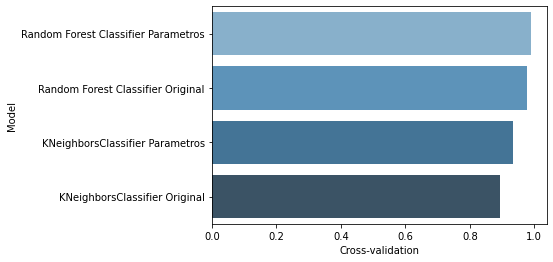

In [57]:
sns.barplot(
    data=cv_comp, x='Cross-validation', y='Model', capsize=.4, errcolor=".5",
    linewidth=3, palette='Blues_d')

Finalmente tras ejecutar Cross-Validation podemos confirmar que el mejor modelo es Random Forest con los parametros seleccionados por "GridSearchCV"

## Exercici 5
### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)





Utilizando el módelo que mejor metricas nos ha dado "Random Forest Classifier Parametros", vamos a analizar cuales de las features aportan más valor a la predicción.

Una vez determinado cuales son estas, las utilizaremos para entrenar de nuevo al modelo, excluyendo aquellas que aportan menos.

In [66]:
# Encontramos el peso de cada una de las columnas en el modelo

perm_importance = permutation_importance(rf2, X_test, y_test)
perm_importance.importances_mean

array([ 0.02592593,  0.0037037 ,  0.        , -0.00740741,  0.01111111,
        0.00740741,  0.01851852,  0.        ,  0.        ,  0.02962963,
        0.0037037 , -0.0037037 ,  0.06296296])

,Value
Alcalinity_of_ash,-0.007407
OD280/OD315_of_diluted_wines,-0.003704
Ash,0.000000
Nonflavanoid_phenols,0.000000
Proanthocyanins,0.000000
Malic_acid,0.003704
Hue,0.003704
Total_phenols,0.007407
Magnesium,0.011111
Flavanoids,0.018519


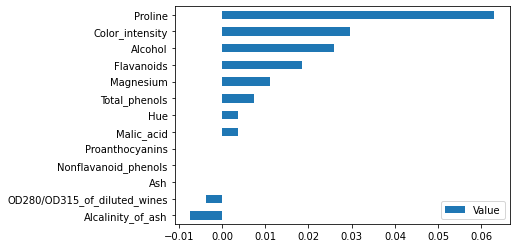

In [67]:
# Encontramos el peso de cada una de las columnas en el modelo

sorted_idx = perm_importance.importances_mean.argsort()
df_importance = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df_importance.plot.barh()
df_importance

In [68]:
#Extraemos las columnas con menos peso y las eliminamos del dataset
unuseful_columns = df_importance[df_importance["Value"] < 0.0001]
unuseful_columns = unuseful_columns.transpose()

X_train_ColumnsOptimized = X_train.drop(unuseful_columns, axis=1)
X_test_ColumnsOptimized = X_test.drop(unuseful_columns, axis=1)

unuseful_columns

,Alcalinity_of_ash,OD280/OD315_of_diluted_wines,Ash,Nonflavanoid_phenols,Proanthocyanins
Value,-0.007407,-0.003704,0.0,0.0,0.0


In [69]:
rfopt = RandomForestClassifier(criterion= 'gini', n_estimators= 200, random_state= 2)
rfopt.fit(X_train_ColumnsOptimized, y_train)
prediction_rfopt = rfopt.predict(X_test_ColumnsOptimized)

accuracy_rfopt = metrics.accuracy_score(y_test, prediction_rfopt)
kappa_rfopt = metrics.cohen_kappa_score(y_test, prediction_rfopt)
cv_rfopt = cross_val_score(estimator = rfopt, X = X_train, y = y_train, cv = 10)

accuracy_rfopt, kappa_rfopt, cv_rfopt.mean()

(0.9814814814814815, 0.9709677419354839, 0.9756410256410255)

In [70]:
rf_opt = pd.DataFrame( data = [('Random Forest Classifier Optimized', accuracy_rfopt, kappa_rfopt, cv_rfopt.mean() ), 
                                  ('Random Forest Classifier Parametros', accuracy_rf2, kappa_rf2, cv_rf2.mean() )],
                         columns = ['Model', 'Accuracy', 'Cohen Kappa', 'Cross-validation'])
rf_opt

,Model,Accuracy,Cohen Kappa,Cross-validation
0,Random Forest Classifier Optimized,0.981481,0.970968,0.975641
1,Random Forest Classifier Parametros,0.962963,0.941935,0.988889


El nuevo modelo optimizado (eliminando las features de menos peso), se muestra mejor analizandolo bajo Accuracy y Cohen Kappa pero si realizamos Cross-Validation, el modelo sin optimizar  da mejor puntuación. 

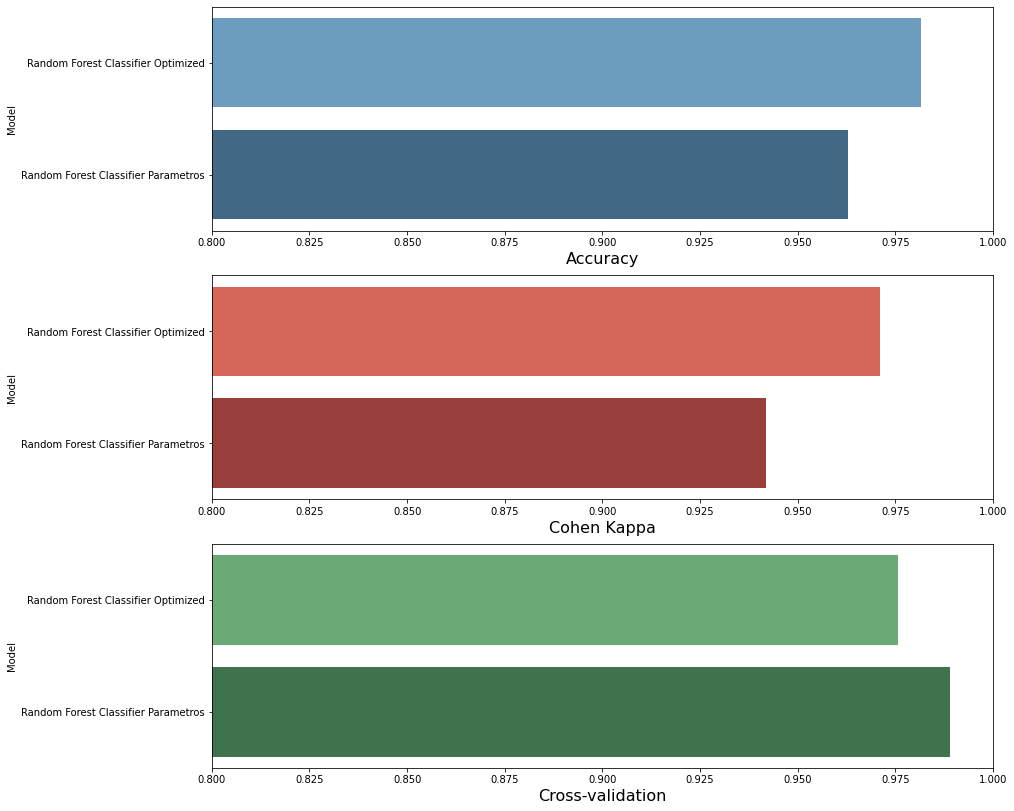

In [71]:
models = rf_opt

f, axes = plt.subplots(3,1, figsize=(14,14))

#models.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = models, palette='Blues_d', ax = axes[0])

axes[0].set_xlabel('Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0.8,1.0)

#models.sort_values(by=['Cohen Kappa'], ascending=False, inplace=True)

sns.barplot(x='Cohen Kappa', y='Model', data = models, palette='Reds_d', ax = axes[1])

axes[1].set_xlabel('Cohen Kappa', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0.8,1.0)

#models.sort_values(by=['Cross-validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-validation', y='Model', data = models, palette='Greens_d', ax = axes[2])

axes[2].set_xlabel('Cross-validation', size=16)
axes[2].set_ylabel('Model')
axes[2].set_xlim(0.8,1.0)

plt.show()